### Introduction

The main goal of this study is to analyze a dataset that contains crime reports in San Francisco between the years 2003 and 2018. This dataset has different information that can be taken into account for the project. The essential details are the location, date and resolution. Therefore, with the wide range of incident cateogries and geographic coverage, it offers insights into long-term crime trends and patterns. 

Our foucs is on the crime category of "UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE" since we would like to know how has evolved during the years and its presence during the week days and times of the day. In our opinion, since the incident is related with alcohol, we think that it might be more common during Fridays and Saturdays and at night. However, we should analyze the data to confirm these facts. Moreover, the location of where these crimes took place is also relevant.

### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import datetime
import calplot
import folium
import json
from folium.plugins import HeatMap, HeatMapWithTime
import seaborn as sns

from random import random

### Data

In [3]:
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")
data_og = data.copy()

focus = 'UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE'

### Time-series / Bar chart

In [4]:
crime_data = data[data['Descript'] == focus]
print(crime_data['DayOfWeek'].value_counts().sort_index())

DayOfWeek
Friday       1427
Monday       1185
Saturday     1841
Sunday       1889
Thursday     1145
Tuesday      1098
Wednesday    1175
Name: count, dtype: int64


C:\Users\nerea\AppData\Local\Temp\ipykernel_3944\1618343477.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  crime_data_two_years = crime_data[data['Date'].dt.year == current_year]
C:\Users\nerea\AppData\Local\Temp\ipykernel_3944\1618343477.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  crime_data_2003 = crime_data[data['Date'].dt.year == 2003]
C:\Users\nerea\AppData\Local\Temp\ipykernel_3944\1618343477.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_data['hour'] = pd.to_datetime(crime_data['Time']).dt.hour
C:\Users\nerea\AppData\Local\Temp\ipykernel_3944\1618343477.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

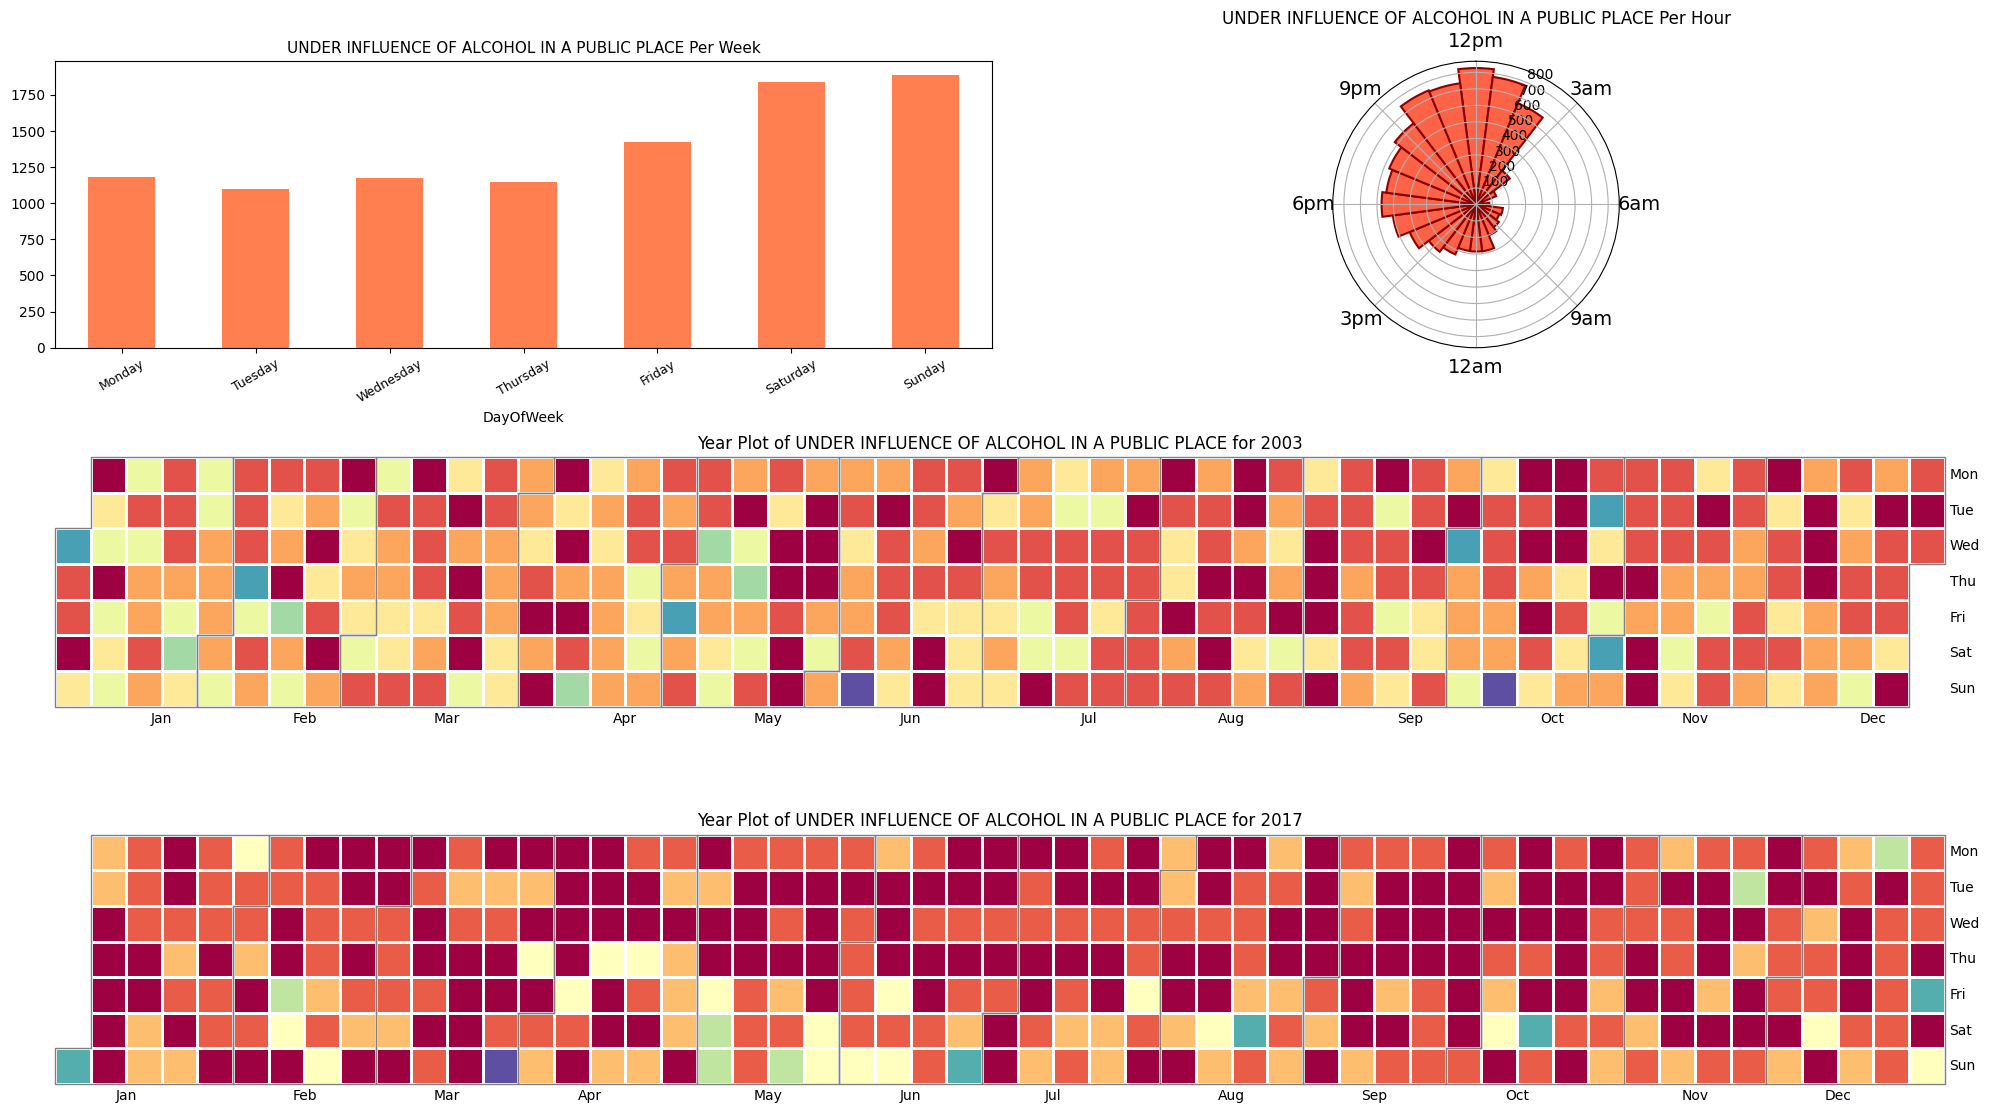

In [6]:
data = data_og.copy()
data['Date'] = pd.to_datetime(data['Date'])
crime_data = data[data['Descript'] == focus]

# Filter data to include only the past two years
current_year = 2017
crime_data_two_years = crime_data[data['Date'].dt.year == current_year]

# Compute daily counts for the past two years
daily_counts_two_years = crime_data_two_years.groupby(pd.Grouper(key='Date', freq='D')).size()

# Filter data for 2003
crime_data_2003 = crime_data[data['Date'].dt.year == 2003]
daily_counts_2003 = crime_data_2003.groupby(pd.Grouper(key='Date', freq='D')).size()

# Set the size of the entire figure
plt.figure(figsize=(20, 15))

# Create a gridspec object
gs = gridspec.GridSpec(4, 2)

# Create subplots
axes = []
axes.append(plt.subplot(gs[0, 0]))  # Weekday bar plot
axes.append(plt.subplot(gs[0, 1], projection='polar'))  # Hours polar plot
axes.append(plt.subplot(gs[1, :]))  # Year plot for 2018 (replacing calendar map)
axes.append(plt.subplot(gs[2, :]))  # Year plot for 2003

# Weekday bar plot
crimes_per_weekday = crime_data['DayOfWeek'].value_counts().sort_index()
crimes_per_weekday = crimes_per_weekday.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
crimes_per_weekday.plot(kind='bar', ax=axes[0], color='coral')
axes[0].set_title(f'{focus} Per Week', fontsize=11)
axes[0].tick_params(axis='x', rotation=30, labelsize=9)

# Hours polar plot
crime_data['hour'] = pd.to_datetime(crime_data['Time']).dt.hour
crime_counts_by_hour = crime_data['hour'].value_counts().sort_index()
ax = axes[1]
ax.bar(np.array(crime_counts_by_hour.index) * 2 * 3.14159 / 24, 
       np.array(crime_counts_by_hour.values), 
       width=2 * 3.14159 / 24,
       color='tomato',
       edgecolor='darkred', 
       linewidth=1.5)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticklabels(['12pm', '3am', '6am', '9am', '12am', '3pm', '6pm', '9pm'], fontsize=14)
ax.set_title(f'{focus} Per Hour')

# Year plot for 2003
calplot.yearplot(daily_counts_2003, year=2003, ax=axes[2], cmap='Spectral')
axes[2].set_title(f'Year Plot of {focus} for 2003')

# Year plot for 2018
calplot.yearplot(daily_counts_two_years, year=current_year, ax=axes[3], cmap='Spectral')
axes[3].set_title(f'Year Plot of {focus} for {current_year}')


plt.tight_layout()
plt.savefig('images/plot1.png')

plt.show()



In order to asses the prevalence of the specific chosen crime, we created a subplot of three different analyses. First of all, we wanted to know the presence of being in a public place under the influence of alcohol along the week. Given that social gatherings and festivities are more prevalent on weekends, we anticipated heightened alcohol consumption during these periods. Observing the bar plot, indeed validates this assumption revealing a higher occurrence of the crime on Saturdays and Sundays.

Another crucial aspect to evaluate was the timing of these offenses, therefore we generated a polar plot. It can be observed ithat the focal crime usually occurs during nighttime hours (between 9 pm and 12 pm) and extends into the early morning (between 12 pm and 3 am). These findings align with the notion that individuals tend to engage in this offense when they are out partying, usually at night.

Finally, a comparative assessment of the crime presence between the initial and final years of the dataset was done through the calendar plots created with *calplot*. Taking into account the colorbar that denotes varying degrees of crime prevalence, blue and purple cells indicate lower occurrences, while darker reds and oranges mean heightened incidences. Therefore, it becomes evident that the incidence of public intoxication has escalated over the course of the dataset, particularly evident in the year 2017 where an increased of arker red-orange cells is observed.

In reflection, the rise in this specific crime highlights the importance of taking proactive steps to address it. We could think of various factors that can drive to this increase, like easier access to alcohol, changes in how society sees certain behaviors or differences in how laws are enforced and monitored. It is important for authorities to investigate the root causes in order to reduce the number of offenses and create safer environments.

## Bokeh visualization

In [7]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, FactorRange, Legend
from bokeh.palettes import Category20

# Load the data and filter for the desired years
df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv', parse_dates=[['Date', 'Time']])
df = df[(df['Date_Time'].dt.year >= 2010) & (df['Date_Time'].dt.year <= 2018)]

# Define the new focus crimes
focuscrimes = [
    'UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE',
    'DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL',
    'SEXUAL BATTERY',
    'UNDER INFLUENCE OF DRUGS IN A PUBLIC PLACE'
]

# Initialize DataFrame for normalized counts
df_norm = pd.DataFrame(np.zeros((24, len(focuscrimes))), columns=focuscrimes)
df_norm['Hour'] = [str(x) for x in range(1, 25)]

# Fill missing hours with zeros
for crime_type in focuscrimes:
    df_CT = df[df['Descript'] == crime_type]
    countByHour_CT = df_CT.groupby(df['Date_Time'].dt.hour).count().reindex(range(24), fill_value=0)["PdId"]
    df_norm[crime_type] = countByHour_CT.values

# Calculate normalized counts for each focus crime by hour
for crime_type in focuscrimes:
    total_count = df_norm[crime_type].sum()
    df_norm[crime_type] = df_norm[crime_type] / total_count if total_count != 0 else 0

# Create ColumnDataSource
source = ColumnDataSource(df_norm)

# Create Bokeh plot
p = figure(width=1000, height=400, x_range=FactorRange(factors=list(map(str, df_norm['Hour'].values.tolist()))),
           title="Crimes By Hour", x_axis_label='Hour of The Day', y_axis_label='Relative Frequency')

# Initialize dictionary to store vbars
bars = {}
items = []

# Add bars for each focus crime
for i, (crime_type, color) in enumerate(zip(focuscrimes, Category20[4])):
    bar = p.vbar(x='Hour', top=crime_type, source=source, alpha=1, color=color, muted_alpha=0.08, muted_color=color,
                 muted=True)
    bars[crime_type] = bar
    items.append((crime_type, [bar]))

# Add legend
legend = Legend(items=items, location=(0, 30))
p.add_layout(legend, "right")

# Configure legend interactivity
p.legend.click_policy = "mute"

# Show the plot
output_file("images/bokeh.html")
output_notebook()
show(p)


C:\Users\nerea\AppData\Local\Temp\ipykernel_3944\3549659903.py:9: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv', parse_dates=[['Date', 'Time']])


Loading BokehJS ...

In [14]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import HoverTool
from bokeh.transform import factor_cmap
from bokeh.palettes import Category10_4

# Load the data and filter for the desired years
df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv', parse_dates=[['Date', 'Time']])
df = df[(df['Date_Time'].dt.year >= 2010) & (df['Date_Time'].dt.year <= 2018)]

# Define the new focus crimes
focuscrimes = [
    'UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE',
    'DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL',
    'SEXUAL BATTERY',
    'UNDER INFLUENCE OF DRUGS IN A PUBLIC PLACE'
]

# Initialize DataFrame for normalized counts
df_norm = pd.DataFrame(np.zeros((24, len(focuscrimes))), columns=focuscrimes)
df_norm['Hour'] = [int(x) for x in range(1, 25)]

# Fill missing hours with zeros
for crime_type in focuscrimes:
    df_CT = df[df['Descript'] == crime_type]
    countByHour_CT = df_CT.groupby(df['Date_Time'].dt.hour).count().reindex(range(24), fill_value=0)["PdId"]
    df_norm[crime_type] = countByHour_CT.values

# Calculate normalized counts for each focus crime by hour
for crime_type in focuscrimes:
    total_count = df_norm[crime_type].sum()
    df_norm[crime_type] = df_norm[crime_type] / total_count if total_count != 0 else 0

# Create a scatter plot
p = figure(title="Correlation Between Crimes and Hours", x_axis_label='Hour of The Day', y_axis_label='Relative Frequency')

# Add data points for each focus crime
for i, crime_type in enumerate(focuscrimes):
    p.scatter(x='Hour', y=crime_type, size=10, color=Category10_4[i], alpha=0.7, legend_label=crime_type, source=df_norm)

# Add hover tool
hover = HoverTool(tooltips=[("Hour", "@Hour"), ("Crime Type", "$name"), ("Relative Frequency", "@$name")])
p.add_tools(hover)

# Set legend location
p.legend.location = "top_left"

# Configure legend interactivity
p.legend.click_policy = "mute"


# Set axis labels
p.xaxis.axis_label = "Hour of The Day"
p.yaxis.axis_label = "Relative Frequency"

# Show the plot
output_file("images/scatter_plot.html")
output_notebook()
show(p)


C:\Users\nerea\AppData\Local\Temp\ipykernel_3944\67045585.py:10: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv', parse_dates=[['Date', 'Time']])


Loading BokehJS ...